In [1]:
import sys
sys.path.insert(0, '../src')

from megs.model.mPCA import mPCA
from megs.data import image, DataLoader, Galaxy

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np
import pickle

import seaborn as sns
sns.set_context("paper", font_scale=1.5)

# Load mm object from the file
#filename = "morphmodel.pkl"
#filename = "2dmorphmodel400.pkl"
#with open(filename, "rb") as file:
#    mm = pickle.load(file)

In [2]:
data = DataLoader("/export/home/ucakir/MEGS/MEGS/src/megs/data/galaxy_data.hdf5", m_min = 8)


File: /export/home/ucakir/MEGS/MEGS/src/megs/data/galaxy_data.hdf5
Group: Galaxies
    Group: Attributes
        Dataset: halo_id (float32) ((12484,))
        Dataset: mass (float32) ((12484,))
    Group: Particles
        Group: stars
            Group: Images
                Group: dim2
                    Dataset: GFM_Metallicity (float32) ((12484, 64, 64))
                    Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64))
                    Dataset: Masses (float32) ((12484, 64, 64))
                Group: dim3
                    Dataset: GFM_Metallicity (float32) ((12484, 64, 64, 64))
                    Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64, 64))
                    Dataset: Masses (float32) ((12484, 64, 64, 64))


In [3]:
norm = image.norm # Normalization function
lower = 0.25
upper = 1.0
norm_function_args = {"Masses": {"takelog": True, "plusone": True,"lower": lower, "upper": upper},
                     "GFM_Metallicity": {"takelog": True, "plusone": True, "lower": 0.25, "upper": upper},
                     "GFM_StellarFormationTime": {"takelog": True, "plusone": True, "lower": 0.25, "upper": upper},
                    
}


In [4]:
mm = mPCA(data, norm_function = norm, norm_function_kwargs=norm_function_args, dim = 2)

Creating datamatrix with the following fields:
Particle type:  stars
Fields:  ['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']
Dimension:  dim2
Default arguments are used for the fields that are not specified in the norm_function_kwargs
Created datamatrix with shape:  (12484, 12288)


In [5]:
mm.fit(n_components = 1000, show_results=False)

In [26]:
scores = mm.get_scores()
eigengalaxies = mm.get_eigengalaxies()
eigengalaxies = eigengalaxies.reshape(len(eigengalaxies), 3, 64,64)
images = mm.get_images()
means = mm.get_means()

In [27]:
print(eigengalaxies.shape)
print(mm._IMG_ORDER)

(1000, 3, 64, 64)
['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']


In [28]:
metal_eigen = eigengalaxies[:,0]
age_eigen = eigengalaxies[:,1]
mass_eigen = eigengalaxies[:,2]

means_metal = means[:,0]
means_age = means[:,1]
means_mass = means[:,2]

In [30]:
eigengalaxies.shape

(1000, 3, 64, 64)

In [33]:
galaxy_minus_mean.shape

(4096,)

In [38]:
eigengalaxies[:,map_index].

(4096000,)

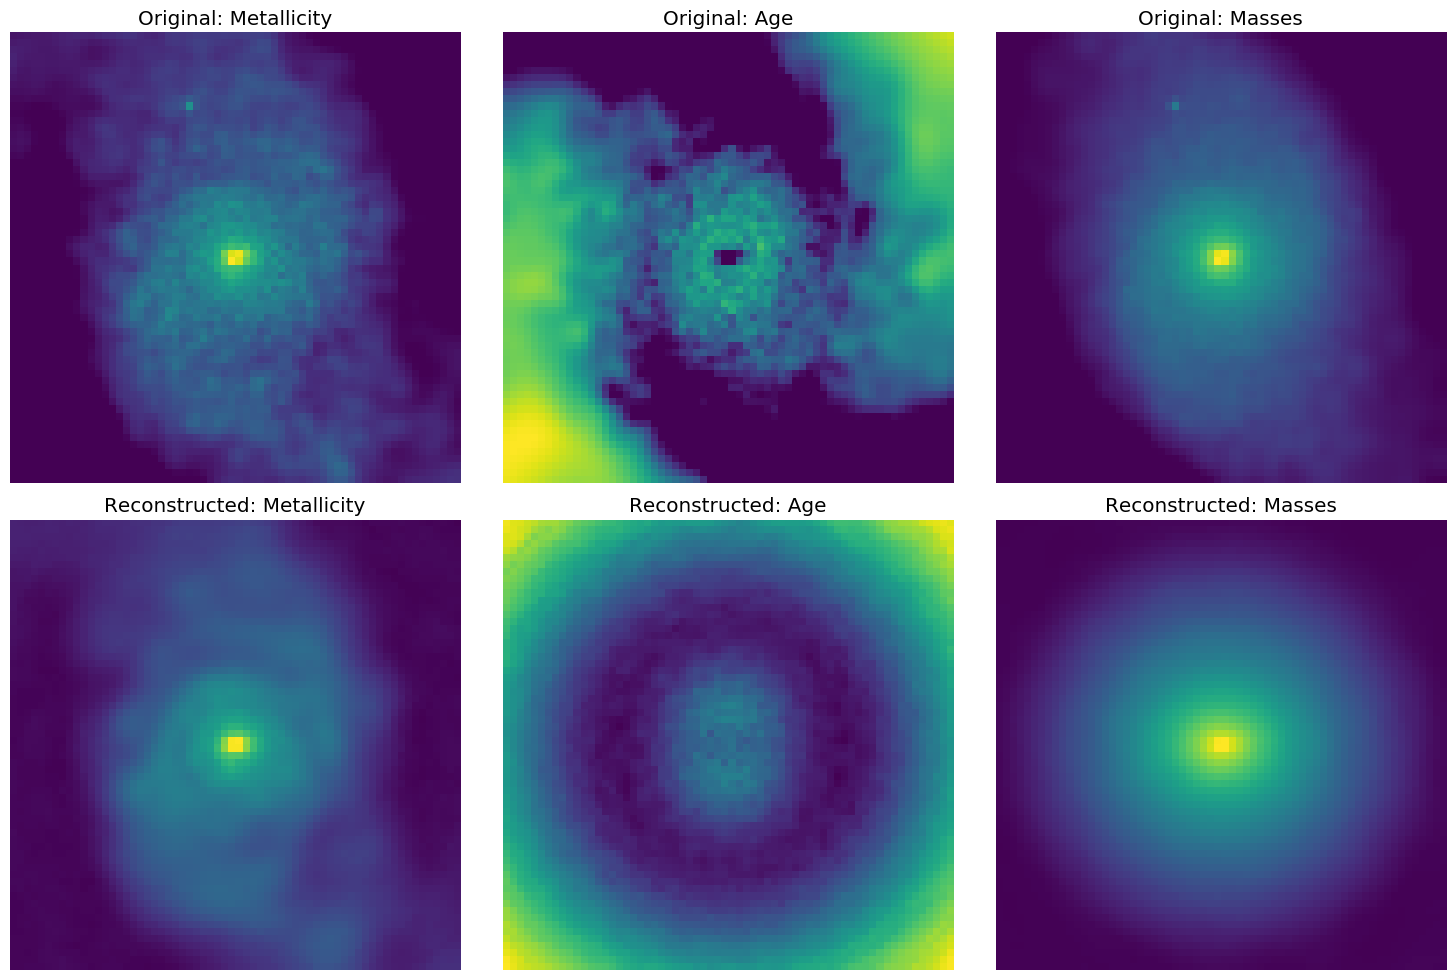

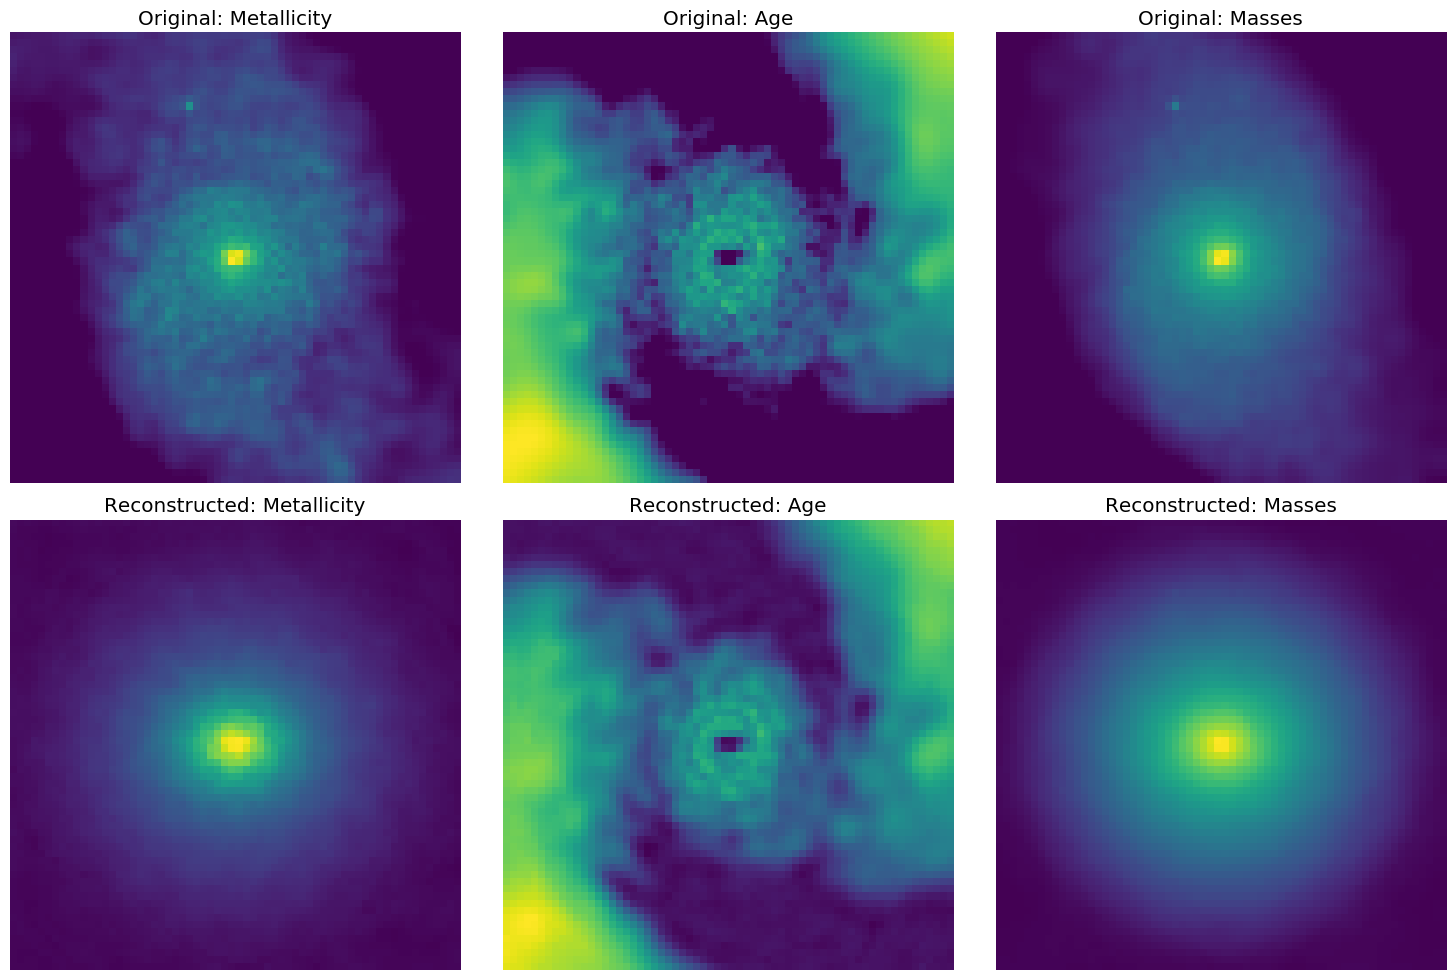

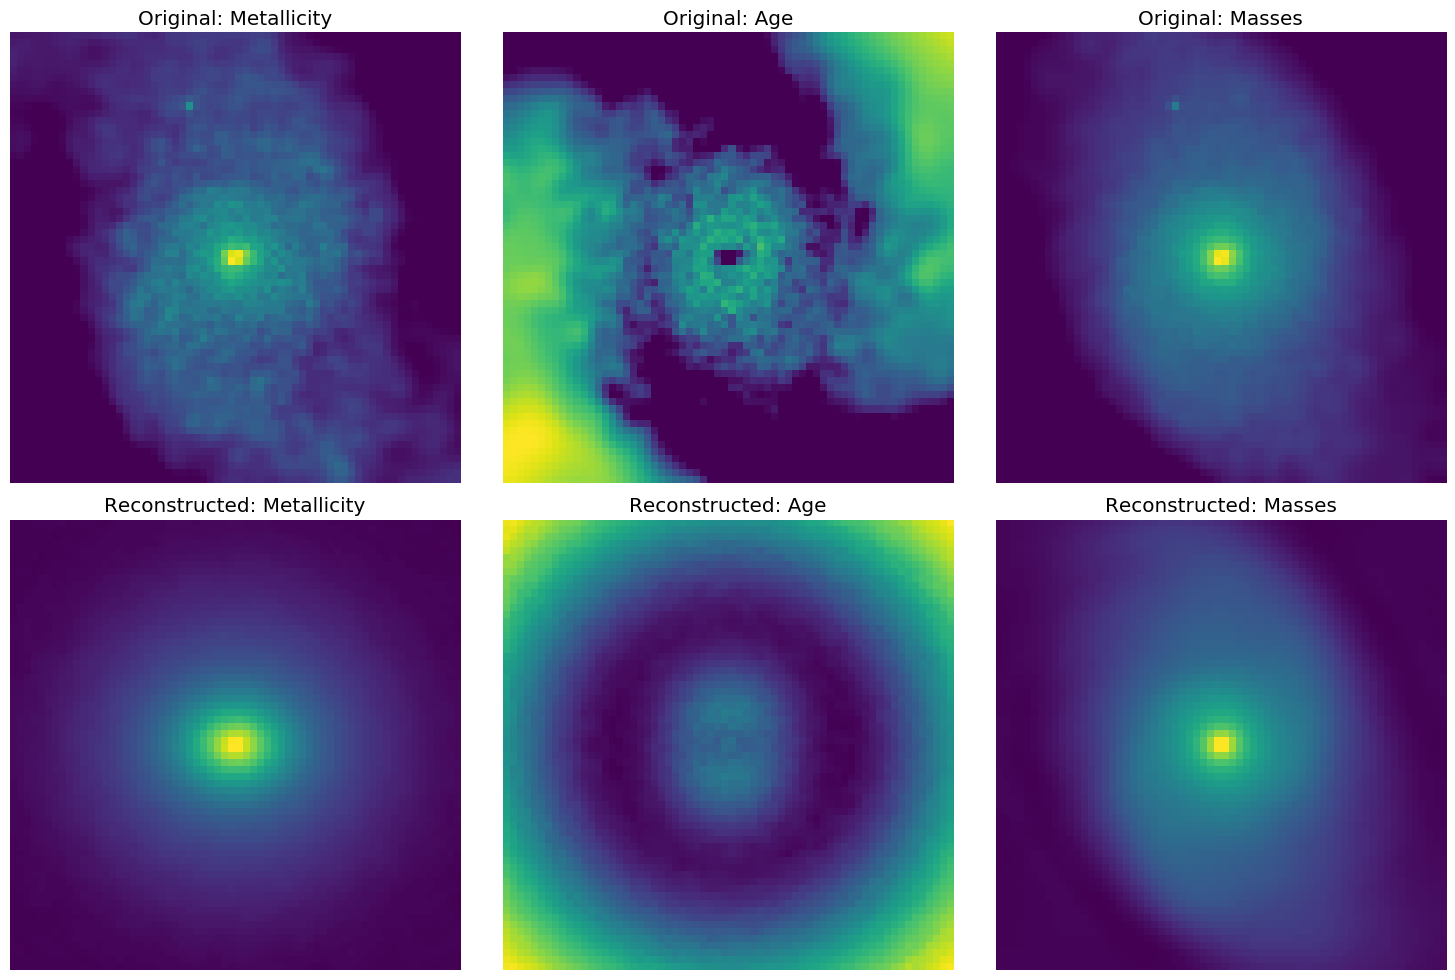

In [83]:
 # zeros = np.zeros((3,64*64))

galaxy_id = 10
map_index = 0

def project_on_eigen(galaxy_id, map_index, eigengalaxies=eigengalaxies, means=means, images = images, plot = True):
    galaxy_img = images[galaxy_id][map_index].flatten()
    flattened_eigen = eigengalaxies[:,map_index].reshape(len(eigengalaxies),-1)
    
    galaxy_minus_mean = galaxy_img - means[map_index].flatten()
    # Now you can project onto the eigengalaxies
    projection = np.dot(galaxy_minus_mean, flattened_eigen.T)
    # Reconstrunction
    recon = means.flatten()+ np.dot(projection, eigengalaxies.reshape(len(eigengalaxies),-1))
    recon = recon.reshape(3,64,64)

    if plot:
        # recon = mm.reconstruct(projection)
        fig,ax = plt.subplots(2,3,figsize=(15,10))

        ax[0,0].imshow(images[galaxy_id][0])
        ax[0,0].set_title("Original: Metallicity")

        ax[0,1].imshow(images[galaxy_id][1])
        ax[0,1].set_title("Original: Age")
        ax[0,2].imshow(images[galaxy_id][2])
        ax[0,2].set_title("Original: Masses")



        ax[1,0].imshow(recon[0])
        ax[1,0].set_title("Reconstructed: Metallicity")

        ax[1,1].imshow(recon[1])
        ax[1,1].set_title("Reconstructed: Age")

        ax[1,2].imshow(recon[2])
        ax[1,2].set_title("Reconstructed: Masses")


        [axi.set_axis_off() for axi in ax.ravel()]
        plt.tight_layout()
        
    return projection
    
metal_project = project_on_eigen(galaxy_id, 0)
age_project = project_on_eigen(galaxy_id, 1)
mass_project = project_on_eigen(galaxy_id, 2)

(0, 500)

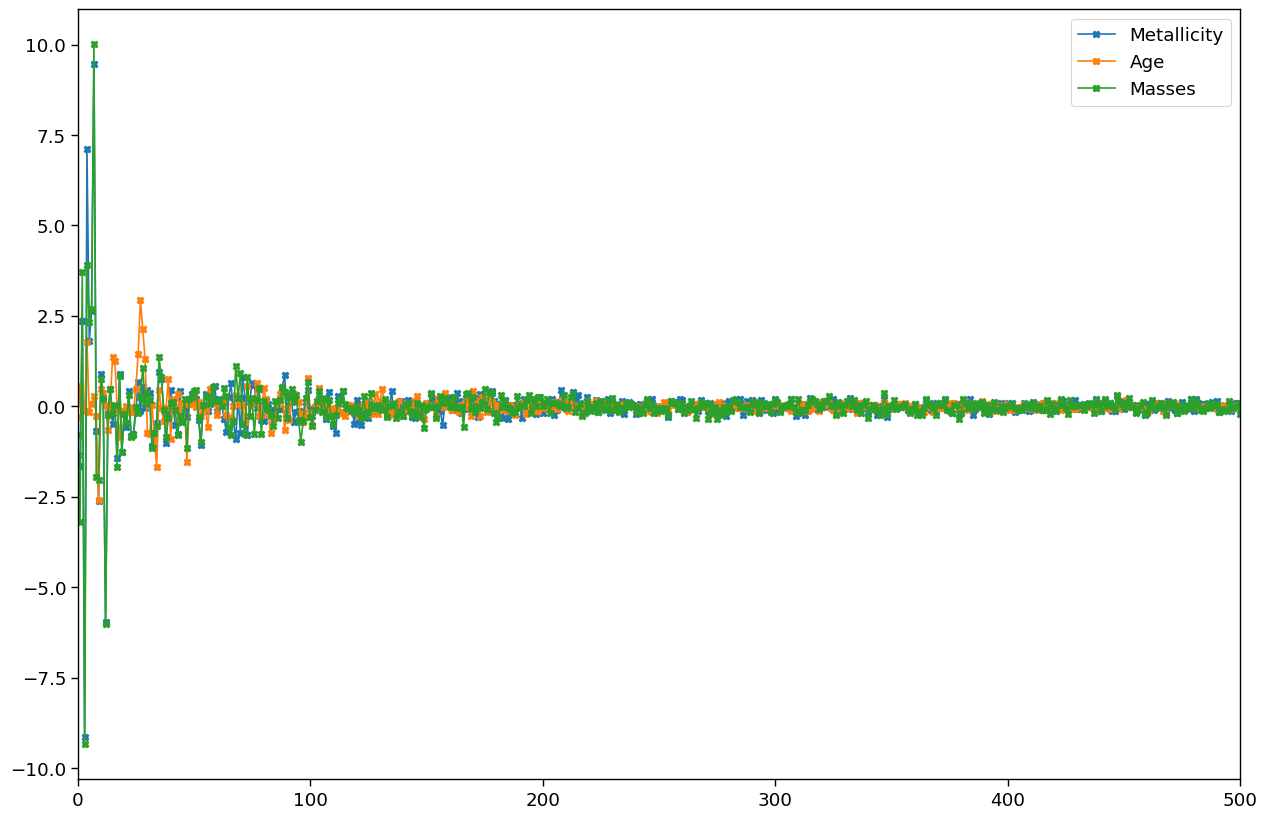

In [59]:
true_scores = scores[galaxy_id]
plt.figure(figsize=(15,10))
plt.plot(metal_project-true_scores, label="Metallicity", marker="X")
plt.plot(age_project-true_scores, label="Age", marker="X")
plt.plot(mass_project-true_scores,  label="Masses", marker="X")

plt.legend()
plt.xlim(0,500)


In [64]:
np.where(metal_project<1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179

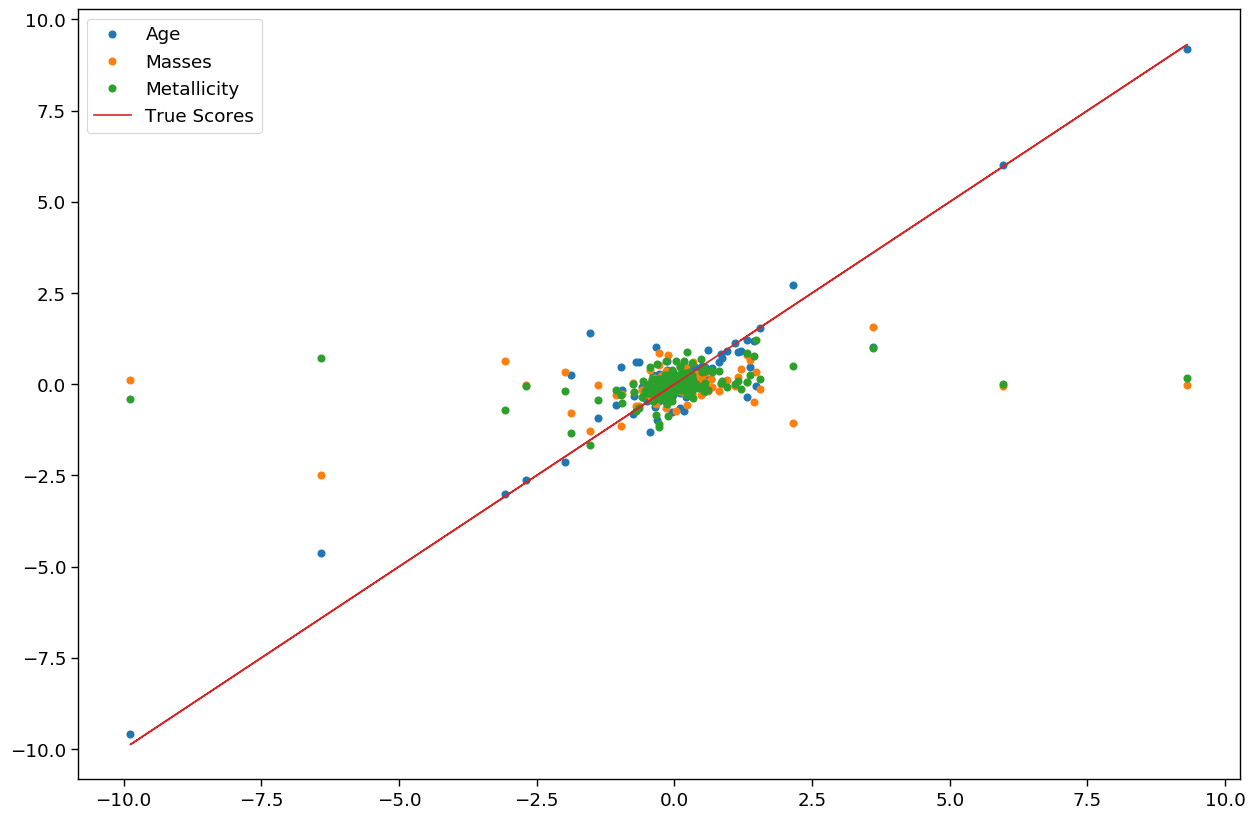

In [63]:
plt.figure(figsize=(15,10))
plt.plot(true_scores, age_project, "o", label="Age")
plt.plot(true_scores, mass_project, "o", label="Masses")
plt.plot(true_scores, metal_project, "o", label="Metallicity")
plt.plot(true_scores, true_scores, label="True Scores")
plt.legend()


In [66]:
from sklearn.decomposition import PCA

In [68]:
metal_images.shape

(12484, 64, 64)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (12484,)

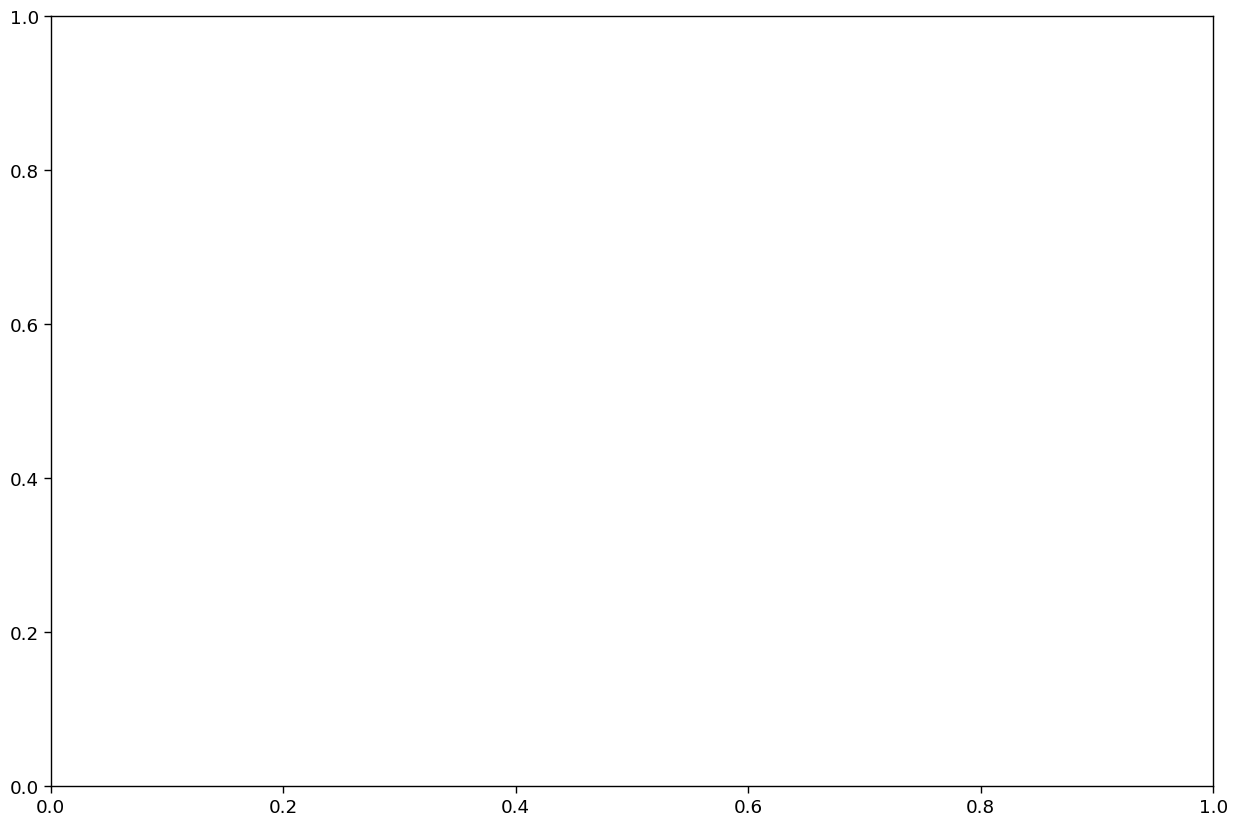

In [69]:
metal_images = images[:,0].reshape(len(images),-1)
age_images = images[:,1].reshape(len(images),-1)
mass_images = images[:,2].reshape(len(images),-1)

pca = PCA(n_components=1000)
pca.fit(metal_images)
pca_metal = pca.transform(metal_images)

pca = PCA(n_components=1000)
pca.fit(age_images)
pca_age = pca.transform(age_images)

pca = PCA(n_components=1000)
pca.fit(mass_images)
pca_mass = pca.transform(mass_images)



In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Train MLR model
x_train, x_test, y_train, y_test = train_test_split(pca_metal, scores, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

mlr.predict(x_test, y_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predict the test set results
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor object
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict the test set results
y_pred = gb.predict(X_test)


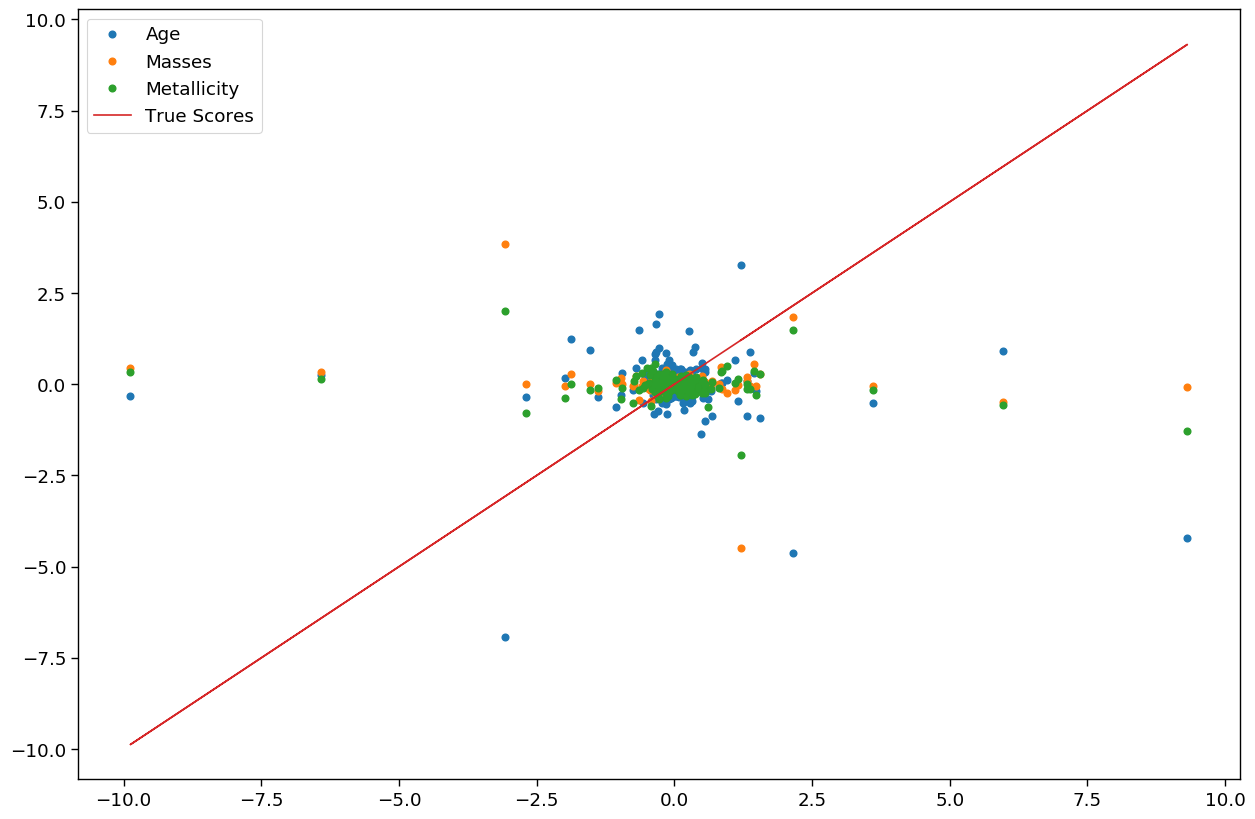

In [72]:
plt.figure(figsize=(15,10))
plt.plot(true_scores, pca_age[0], "o", label="Age")
plt.plot(true_scores, pca_mass[0], "o", label="Masses")
plt.plot(true_scores, pca_metal[0], "o", label="Metallicity")
plt.plot(true_scores, true_scores, label="True Scores")
plt.legend()

In [85]:
from tqdm import trange

In [87]:
metal = []
age = []
mass = []
true = []

for i in trange(50):
    metal_project = project_on_eigen(i, 0, plot=False)
    age_project = project_on_eigen(i, 1, plot=False)
    mass_project = project_on_eigen(i, 2, plot=False)
    true_scores = scores[i]
    
    metal.append(metal_project)
    age.append(age_project)
    mass.append(mass_project)
    true.append(true_scores)


100%|██████████| 50/50 [00:32<00:00,  1.52it/s]


In [101]:
age = np.array(age)
mass = np.array(mass)
metal = np.array(metal)
true = np.array(true)

In [99]:
age[:,0]

(50,)

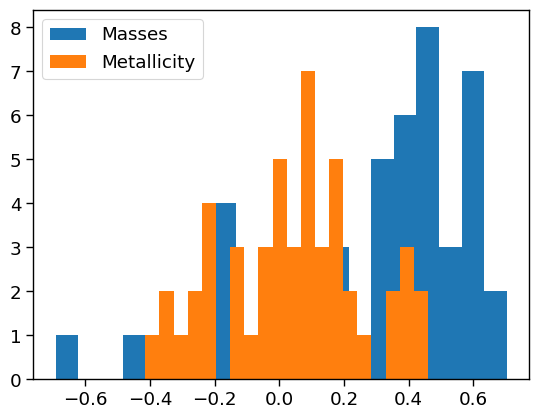

In [105]:

plt.hist(mass[:,0], bins=20, label="Masses")
plt.hist(metal[:,0], bins=20, label="Metallicity")

plt.legend()